Theo Filus Handy S - 0706022210051

In [7]:
#Import Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [8]:
#Load Dataset

df = pd.read_csv("https://raw.githubusercontent.com/tfilushandy/DATASET-DM-WEEK-6/refs/heads/main/breast-cancer.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [12]:
df.sample(n=10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
509,915460,M,15.46,23.95,103.80,731.3,0.11830,0.18700,0.203000,0.085200,...,17.110,36.33,117.70,909.4,0.17320,0.4967,0.59110,0.21630,0.3013,0.10670
217,8811779,B,10.20,17.48,65.05,321.2,0.08054,0.05907,0.057740,0.010710,...,11.480,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809
134,867739,M,18.45,21.91,120.20,1075.0,0.09430,0.09709,0.115300,0.068470,...,22.520,31.39,145.60,1590.0,0.14650,0.2275,0.39650,0.13790,0.3109,0.07610
410,905502,B,11.36,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,...,13.050,36.32,85.07,521.3,0.14530,0.1622,0.18110,0.08698,0.2973,0.07745
305,893061,B,11.60,24.49,74.23,417.2,0.07474,0.05688,0.019740,0.013130,...,12.440,31.62,81.39,476.5,0.09545,0.1361,0.07239,0.04815,0.3244,0.06745
202,878796,M,23.29,26.67,158.90,1685.0,0.11410,0.20840,0.352300,0.162000,...,25.120,32.68,177.00,1986.0,0.15360,0.4167,0.78920,0.27330,0.3198,0.08762
116,864726,B,8.95,15.76,58.74,245.2,0.09462,0.12430,0.092630,0.023080,...,9.414,17.07,63.34,270.0,0.11790,0.1879,0.15440,0.03846,0.1652,0.07722
185,874158,B,10.08,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,...,11.870,21.18,75.39,437.0,0.15210,0.1019,0.00692,0.01042,0.2933,0.07697
291,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.059400,0.048190,...,16.250,26.19,109.10,809.8,0.13130,0.3030,0.18040,0.14890,0.2962,0.08472
85,8612399,M,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.133500,0.087950,...,22.930,27.68,152.20,1603.0,0.13980,0.2089,0.31570,0.16420,0.3695,0.08579


In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

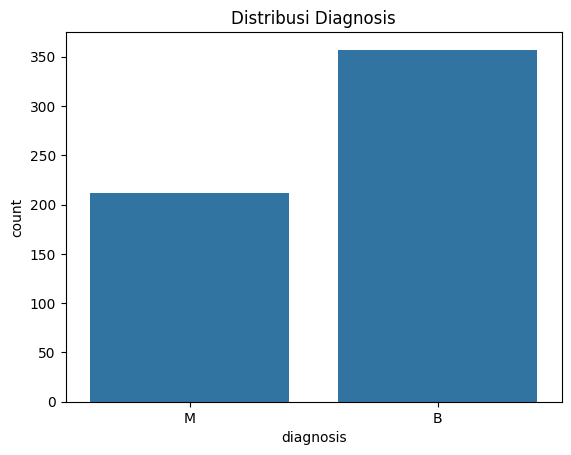

In [14]:
# Visualisasi distribusi diagnosis
sns.countplot(x='diagnosis', data=df)
plt.title('Distribusi Diagnosis')
plt.show()

In [15]:
# Preprocessing
# Encode kolom diagnosis
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # B=0, M=1

In [16]:
df.sample(n=10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
152,8710441,0,9.731,15.34,63.78,300.2,0.10720,0.15990,0.410800,0.078570,...,11.020,19.49,71.04,380.5,0.12920,0.27720,0.82160,0.15710,0.3108,0.12590
210,881046502,1,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.164000,0.095610,...,23.240,27.84,158.30,1656.0,0.11780,0.29200,0.38610,0.19200,0.2909,0.05865
232,88203002,0,11.220,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,12.360,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
418,906024,0,12.700,12.17,80.88,495.0,0.08785,0.05794,0.023600,0.024020,...,13.650,16.92,88.12,566.9,0.13140,0.16070,0.09385,0.08224,0.2775,0.09464
456,9112366,0,11.630,29.29,74.87,415.1,0.09357,0.08574,0.071600,0.020170,...,13.120,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220
96,86211,0,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.830,20.92,82.14,495.2,0.11400,0.09358,0.04980,0.05882,0.2227,0.07376
462,9113156,0,14.400,26.99,92.25,646.1,0.06995,0.05223,0.034760,0.017370,...,15.400,31.98,100.40,734.6,0.10170,0.14600,0.14720,0.05563,0.2345,0.06464
239,88330202,1,17.460,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,...,22.510,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
122,865423,1,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.426800,0.201200,...,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
59,858477,0,8.618,11.79,54.34,224.5,0.09752,0.05272,0.020610,0.007799,...,9.507,15.40,59.90,274.9,0.17330,0.12390,0.11680,0.04419,0.3220,0.09026


In [18]:
# Memisahkan fitur dan label Spliting
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

In [19]:
# Standarisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [20]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Model 1: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [24]:
# Model 2: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [25]:
# Model 3: Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



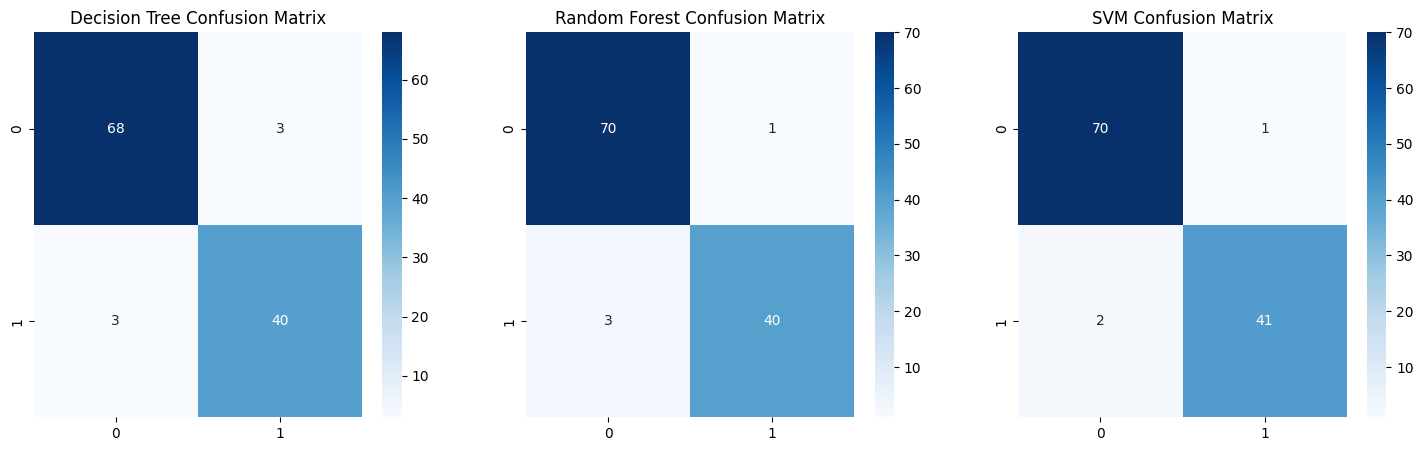

In [33]:
# Confusion Matrix Visualization for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Decision Tree Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree Confusion Matrix')

# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')

# SVM Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('SVM Confusion Matrix')

plt.show()

Random Forest dan SVM memiliki performa yang lebih baik dibandingkan Decision Tree, terutama dalam memprediksi kelas 0.
SVM memiliki sedikit keunggulan dalam prediksi kelas 1 dibandingkan Random Forest dan Decision Tree.
Random Forest dan SVM menghasilkan lebih sedikit kesalahan dibandingkan Decision Tree, yang menunjukkan kemampuan model ensambel dan margin pemisahan SVM yang lebih baik untuk dataset ini.